In [21]:
# Packages / libraries - Math
import os #provides functions for interacting with the operating system
import numpy as np # processing of large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions for operating on these matrices
import pandas as pd # provides structures and operations for manipulating numeric tables and time series
import matplotlib.pyplot as plt #plot graphics
import glob #provides the files in input directory

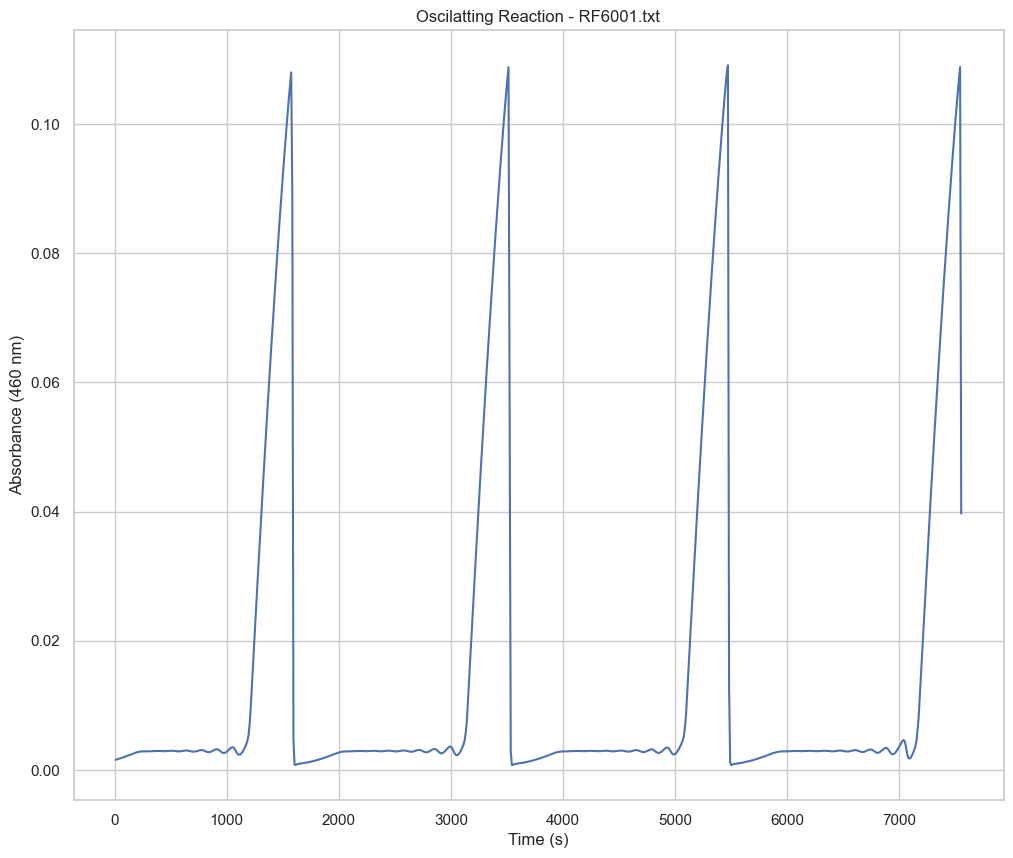

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 1200x1000 with 0 Axes>

In [23]:
#input and output directory
input_directory = 'D:\\Documentos\\Python\\old_data\\'
output_directory = 'D:\\Documentos\\Python\\new_data\\'

#get the list of files
input_files = glob.glob(os.path.join(input_directory, '*.txt'))

#loop  for input and output files
for input_file in input_files:
    #get the input file name
    file_name = os.path.basename(input_file)
    
    #loading the raw data
    raw_data = pd.read_csv(input_file)
    
    #delete the first 41 lines and build a new dataframe
    df = raw_data.iloc[41:]
    
    #write the new file in CSV without a index
    output_file = os.path.join(output_directory, file_name.replace('.txt', '.csv'))
    df.to_csv(output_file, index=False)
    
    #Loading the new data and use space as delimiter 
    new_data = pd.read_csv(output_file, delim_whitespace=True)
    
    #rename columns
    new_data.columns = ['Time /s', 'Absorbance (460 nm)']
    
    #plot linegraph
    plt.plot(new_data['Time /s'], new_data['Absorbance (460 nm)'])
    plt.xlabel('Time (s)')
    plt.ylabel('Absorbance (460 nm)')
    plt.title('Oscilatting Reaction - ' + file_name)
    plt.grid(True)
    # Salvar o gráfico em formato PNG
    output_image = os.path.join(output_directory, file_name.replace('.txt', '.png'))
    plt.savefig(output_image)
    
    plt.show()
    